# Household EDA on OpenSAFELY dummy data

Python code for pulling in the full-sized dummy data and running EDA relevant to household analysis

Output is a set of figures and log for checking


In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import scipy.optimize as op
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import logging
import os

In [2]:
logging.basicConfig(filename='./output.log', level=logging.INFO, format='%(asctime)s %(message)s')
logging.info('Libraries imported and logging started')

# CHANGE THE NEXT CELL

The next set of cell is the one that would need changing for a different data source in the same format


In [3]:
# This is a standard extract from the server, with a couple of do-files to manipulate the data

df = pd.read_csv("../hh_analysis_datasetALLVARS.csv")

In [4]:
logging.info('Data Read In')

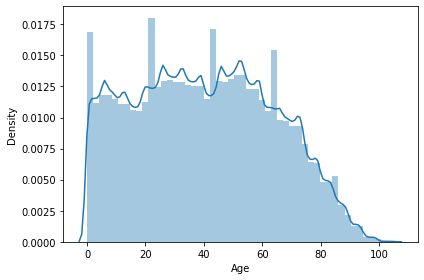

In [5]:
# Visualise the age distribution in the samples

plt.figure(figsize=(6,4))
sns.distplot(df.age.values)
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('./ages.pdf')

In [6]:
logging.info('Age figure plotted')

In [7]:
# Set up arrays for the size and number positive in each household

hhnums = pd.unique(df.hh_id)
nhh = len(hhnums)

hhsizes = np.zeros(nhh)
hhpos = np.zeros(nhh)
hhneg = np.zeros(nhh)
hhmis = np.zeros(nhh)
for i, num in enumerate(hhnums):
    dfh = df[df.hh_id == num]
    hhsizes[i] = len(dfh)
    hhpos[i] = np.sum(dfh.case == 1)
    hhneg[i] = np.sum(dfh.case == 0)
    hhmis[i] = np.sum(pd.isna(dfh.case))

In [8]:
# Maximum household size of interest

hm = 10

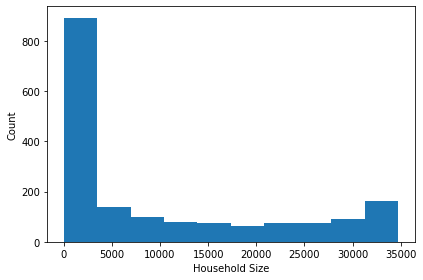

In [9]:
# Check the distribution of household sizes

plt.figure(figsize=(6,4))
plt.hist(hhsizes)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./hh_sizes.pdf')

In [10]:
logging.info('Household size figure plotted')

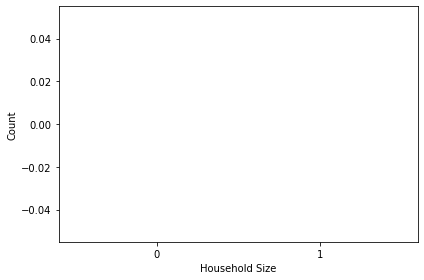

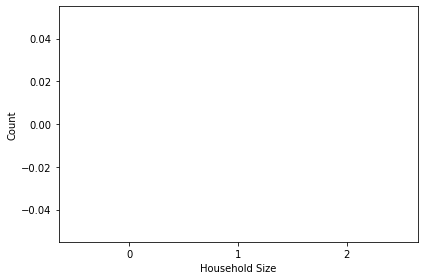

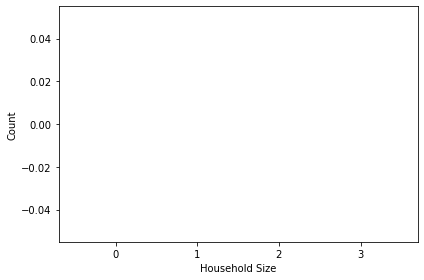

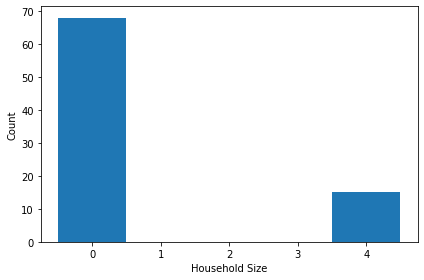

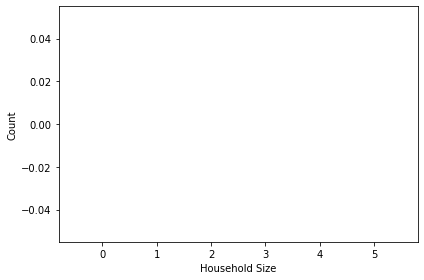

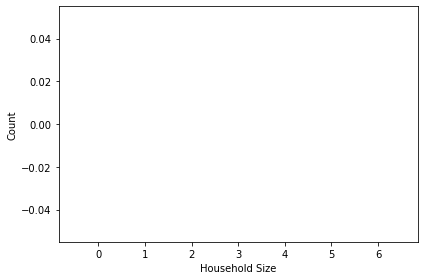

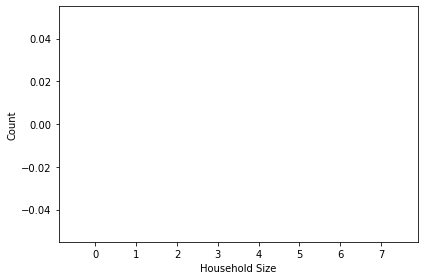

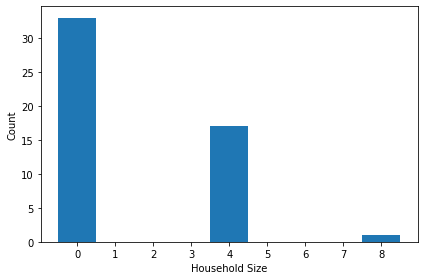

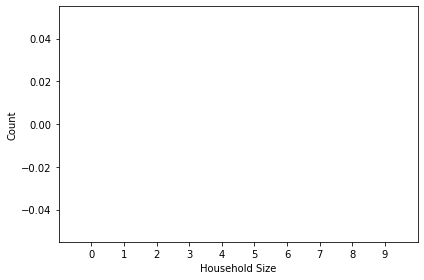

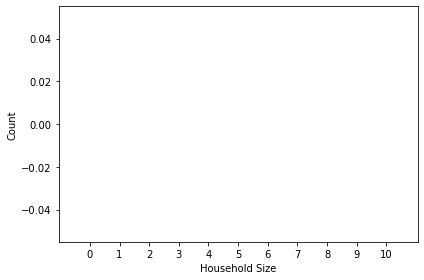

In [11]:
# Look at the distribution of cases in households by size

for nhsize in range(1,hm+1):
    jj = np.where(hhsizes==nhsize)[0]
    plt.figure(figsize=(6,4))
    plt.hist(hhpos[jj],np.arange(-0.5,nhsize+1.5,1.))
    plt.xticks(np.arange(0,nhsize+1,1))
    plt.xlabel('Household Size')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('./hh_cases_' + str(nhsize) + '.pdf')

In [12]:
logging.info('Household cases figures plotted')